# Univariate plotting with pandas

In [4]:
%matplotlib inline

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
sns.set_style('white')

In [6]:
reviews = pd.read_csv("data/winemag-data_first150k.csv", index_col=0)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


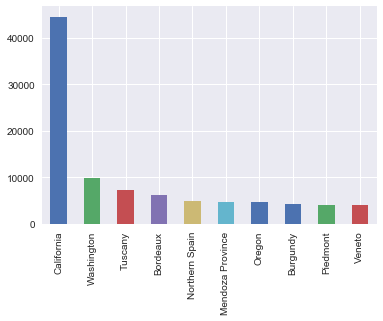

In [7]:
reviews['province'].value_counts().head(10).plot.bar()

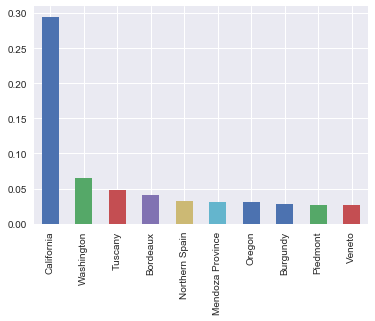

In [8]:
(reviews['province'].value_counts().head(10) / len(reviews)).plot.bar();

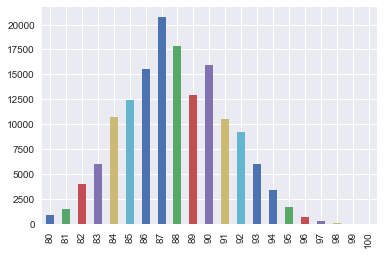

In [11]:
reviews['points'].value_counts().sort_index().plot.bar();

## Line charts

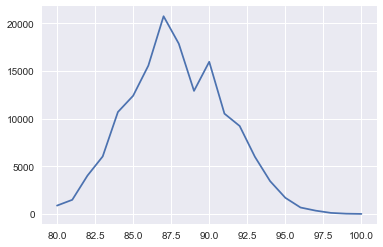

In [12]:
reviews['points'].value_counts().sort_index().plot.line();

## Area charts

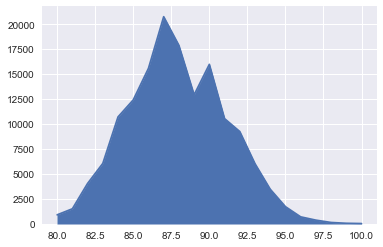

In [13]:
reviews['points'].value_counts().sort_index().plot.area()

## Interval data

## Histograms

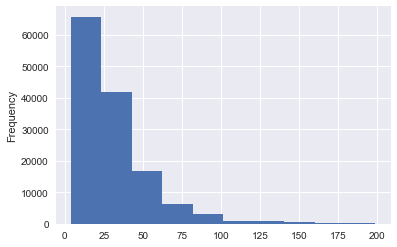

In [16]:
reviews[reviews['price'] < 200]['price'].plot.hist();

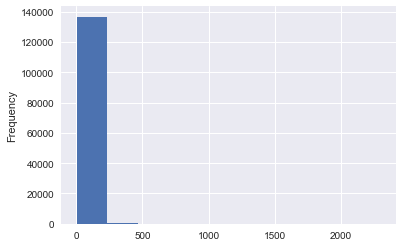

In [17]:
reviews['price'].plot.hist()

In [18]:
reviews[reviews['price'] > 1500]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
13318,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Chardonnay,Blair
34920,France,"A big, powerful wine that sums up the richness...",NaN,99,2300.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Latour
34922,France,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,NaN,Bordeaux-style Red Blend,Château Margaux


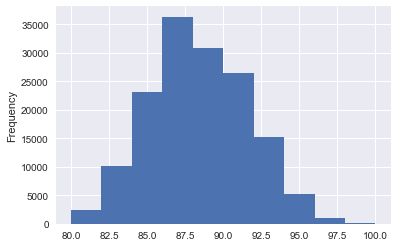

In [19]:
reviews['points'].plot.hist();

# Bivariate plotting with Pandas

## Scatter plot

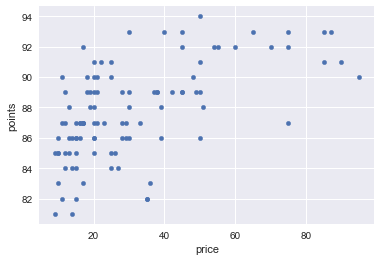

In [23]:
reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points');

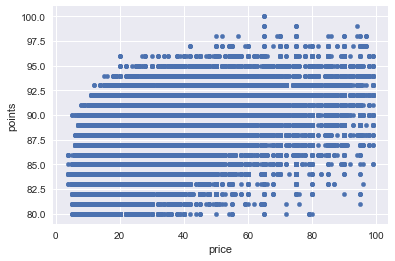

In [24]:
reviews[reviews['price'] < 100].plot.scatter(x='price', y='points')

### Hexplot

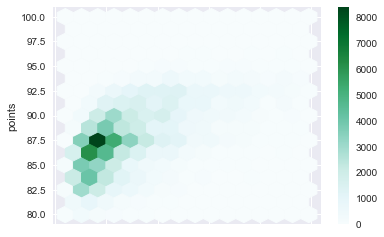

In [25]:
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15);

### Stacked plots

In [27]:
wine_counts = pd.read_csv('data/top-five-wine-score-counts.csv',
                          index_col=0)

In [28]:
wine_counts.head()

,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5.0,87.0,68.0,36.0,72.0
81,18.0,159.0,150.0,83.0,107.0
82,72.0,435.0,517.0,295.0,223.0
83,95.0,570.0,669.0,346.0,364.0
84,268.0,923.0,1146.0,733.0,602.0


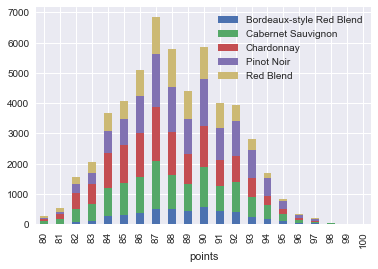

In [29]:
wine_counts.plot.bar(stacked=True);

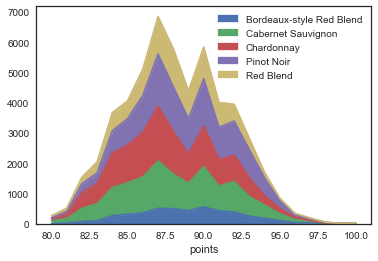

In [34]:
wine_counts.plot.area();

### Bivariate line chart

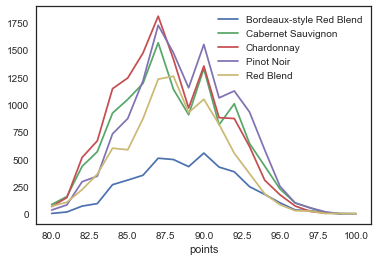

In [35]:
wine_counts.plot.line();

# Styling your plots

## Points on style

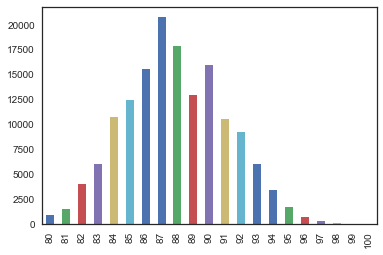

In [36]:
reviews['points'].value_counts().sort_index().plot.bar();

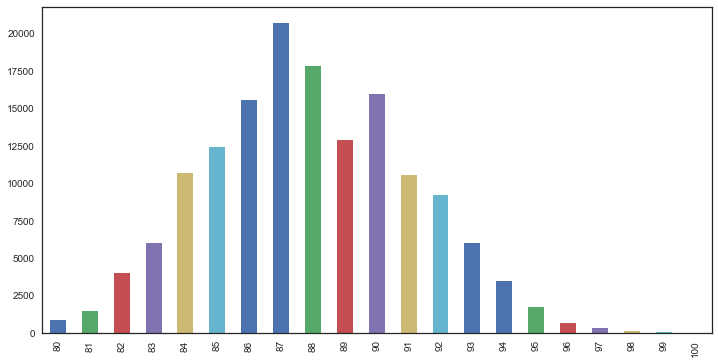

In [37]:
reviews['points'].value_counts().sort_index().plot.bar(figsize=(12, 6));

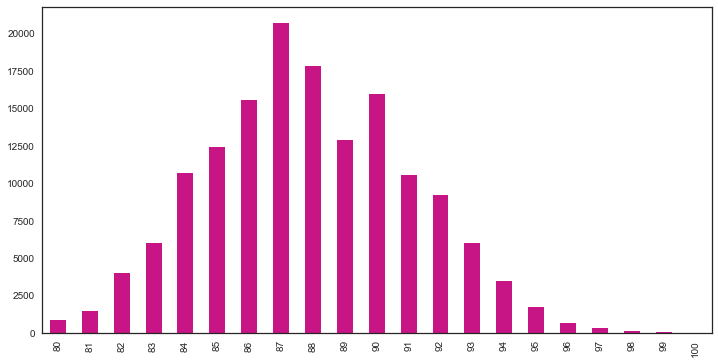

In [38]:
reviews['points'].value_counts().sort_index().plot.bar(
    figsize=(12, 6),
    color='mediumvioletred'
);

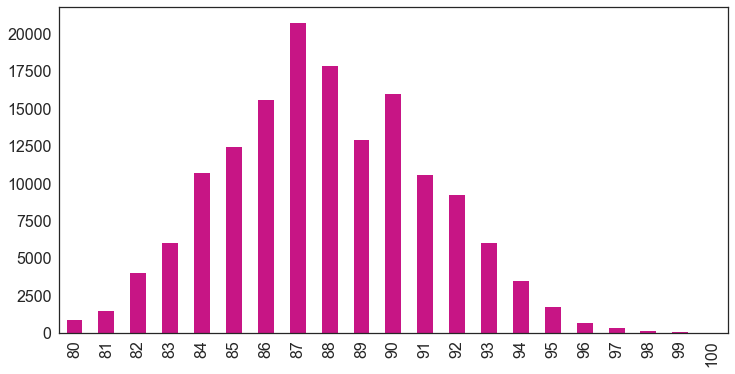

In [39]:
reviews['points'].value_counts().sort_index().plot.bar(
    figsize=(12, 6),
    color='mediumvioletred',
    fontsize=16
);

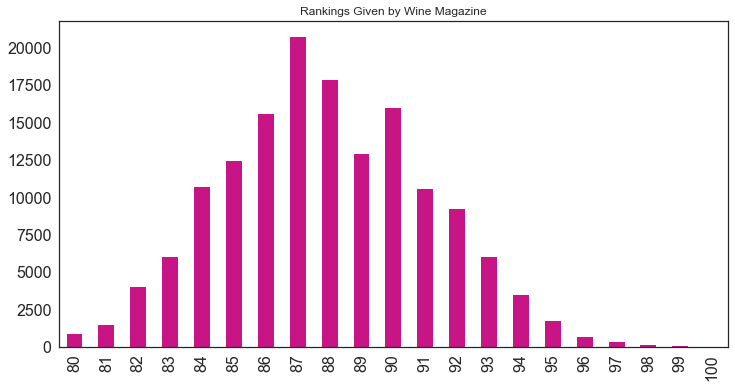

In [40]:
reviews['points'].value_counts().sort_index().plot.bar(
    figsize=(12, 6),
    color='mediumvioletred',
    fontsize=16,
    title='Rankings Given by Wine Magazine',
);

the title size cannot be changed in Pandas directly so using Matplotlib

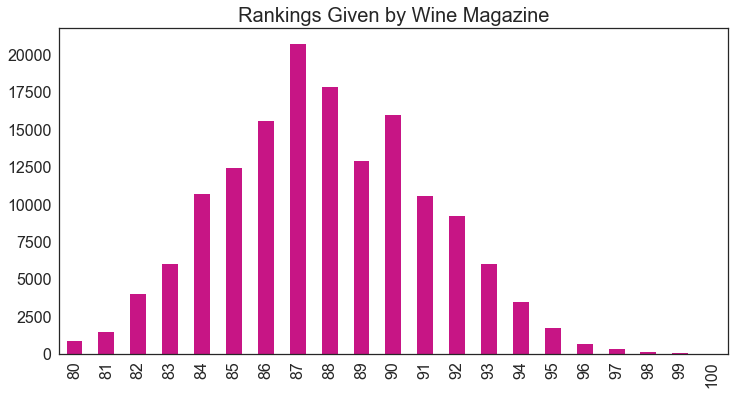

In [41]:
import matplotlib.pyplot as plt

ax = reviews['points'].value_counts().sort_index().plot.bar(
    figsize=(12, 6),
    color='mediumvioletred',
    fontsize=16
)
ax.set_title("Rankings Given by Wine Magazine", fontsize=20);

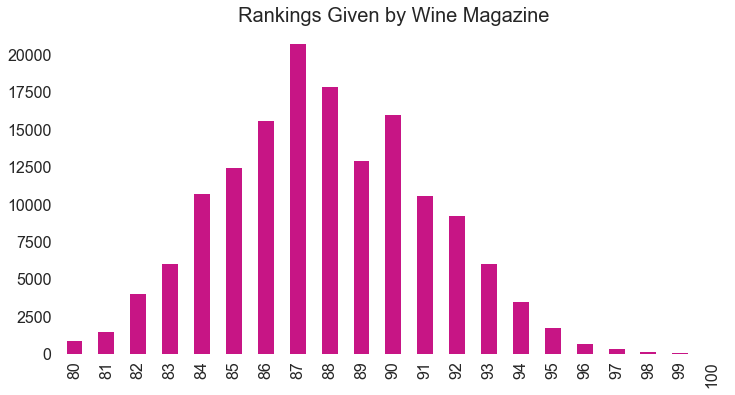

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = reviews['points'].value_counts().sort_index().plot.bar(
    figsize=(12, 6),
    color='mediumvioletred',
    fontsize=16
)
ax.set_title("Rankings Given by Wine Magazine", fontsize=20)
sns.despine(bottom=True, left=True)

# Subplotting

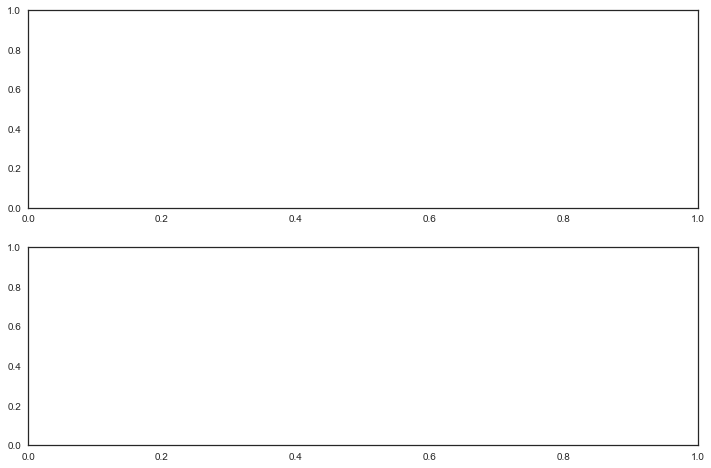

In [43]:
import matplotlib.pyplot as plt
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))

In [45]:
axarr

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a27621e80>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a2da5e588>], dtype=object)

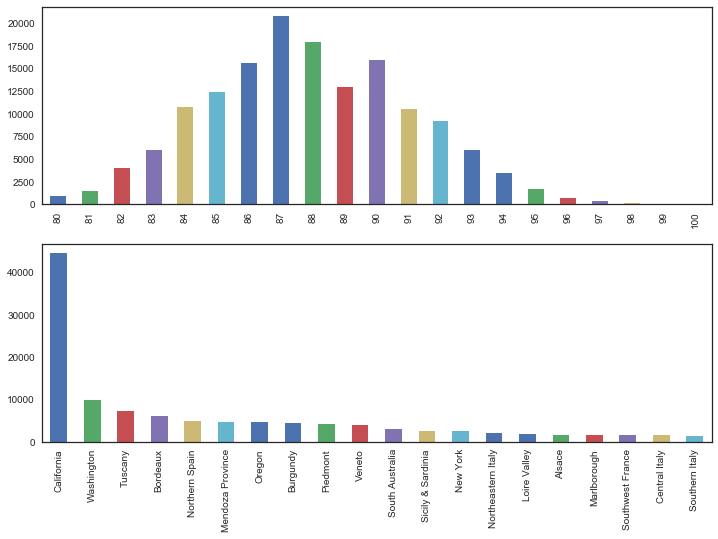

In [48]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))

reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0]
)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1]
);

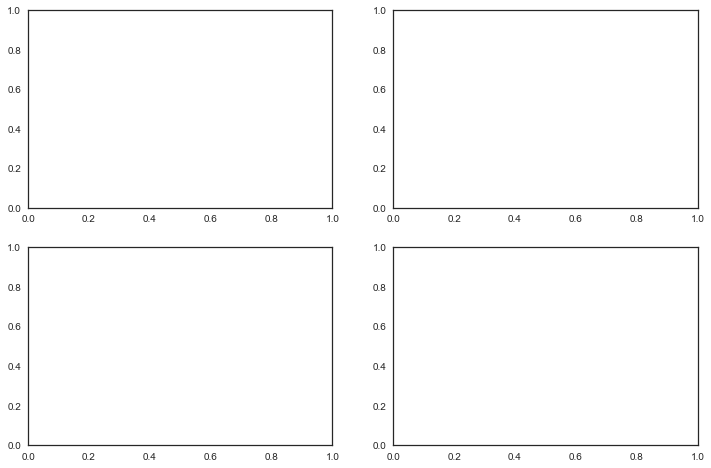

In [49]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

In [50]:
axarr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2e3d6c18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a2e472630>]], dtype=object)

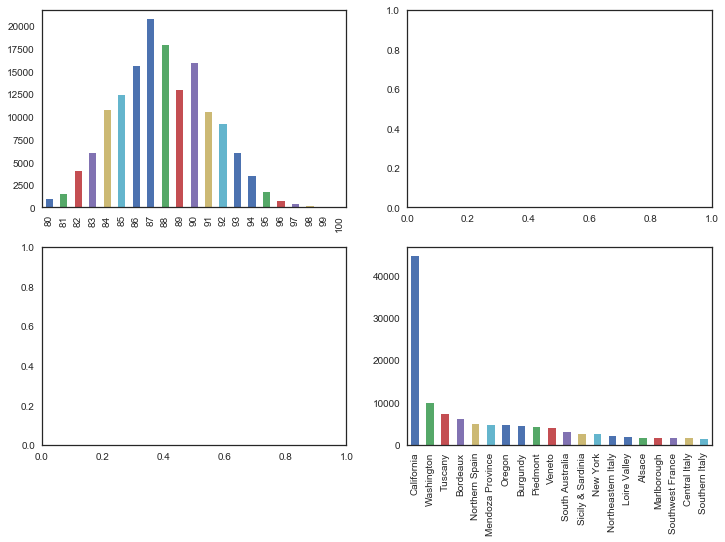

In [51]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0][0]
)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1][1]
);

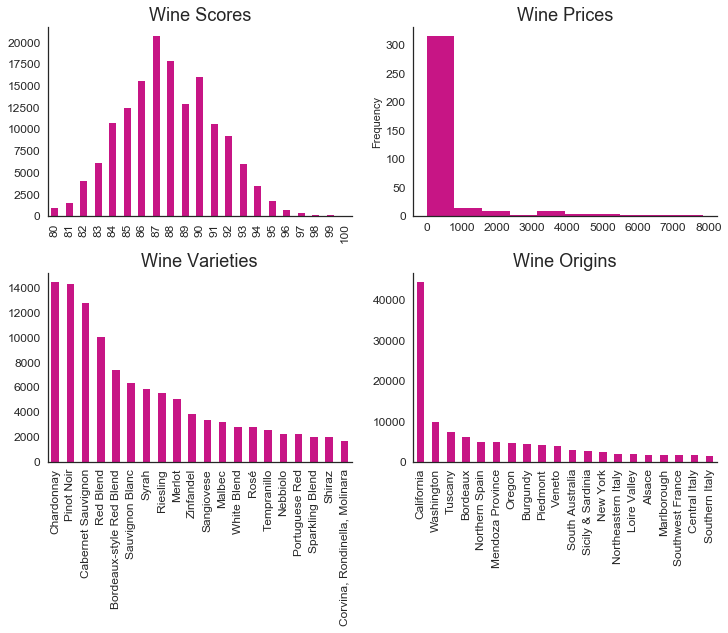

In [54]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0][0], fontsize=12, color='mediumvioletred'
)
axarr[0][0].set_title("Wine Scores", fontsize=18)

reviews['variety'].value_counts().head(20).plot.bar(
    ax=axarr[1][0], fontsize=12, color='mediumvioletred'
)
axarr[1][0].set_title("Wine Varieties", fontsize=18)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1][1], fontsize=12, color='mediumvioletred'
)
axarr[1][1].set_title("Wine Origins", fontsize=18)

reviews['price'].value_counts().plot.hist(
    ax=axarr[0][1], fontsize=12, color='mediumvioletred'
)
axarr[0][1].set_title("Wine Prices", fontsize=18)

plt.subplots_adjust(hspace=.3)

import seaborn as sns
sns.despine();

## Example 

In [58]:
import numpy as np
import scipy.stats as stats

In [101]:
chi_values = np.arange(0, 25, .1)
chi_values_prob_4 = stats.chi2.pdf(chi_values, 4) #degree of freedom 4
chi_values_prob_10 = stats.chi2.pdf(chi_values, 10) #degree of freedom 10
chi_value_df = pd.DataFrame({'value': chi_values, 'df4': chi_values_prob_4, 'df10': chi_values_prob_10})
chi_value_df.head()

,df10,df4,value
0,0.000000e+00,0.000000,0.0
1,1.238580e-07,0.023781,0.1
2,1.885078e-06,0.045242,0.2
3,9.077779e-06,0.064553,0.3
4,2.729103e-05,0.081873,0.4


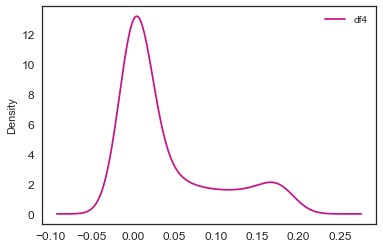

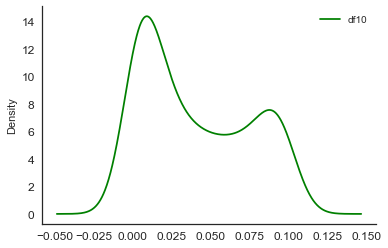

In [75]:
chi_value_df.plot.kde(x='value', y='df4',
                      fontsize=12, color='mediumvioletred'
)
chi_value_df.plot.kde(x='value', y='df10',
                      fontsize=12, color='green'
)
import seaborn as sns
sns.despine();

### Workflow
- Import
- Tidy data (--> Pandas Dataframe)
- Transform data (e.g. add compute new variables = columns e.g. probability
- Visualise dataframe / Model

## Example end

### Countplot

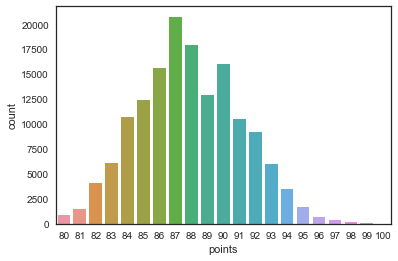

In [107]:
sns.countplot(reviews['points']);

## KDE Plot

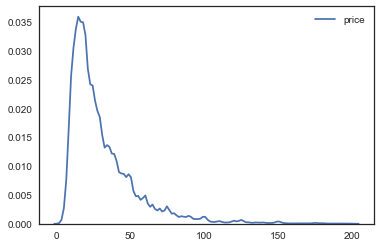

In [148]:
sns.kdeplot(reviews.query('price < 200').price)

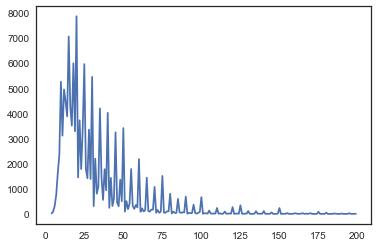

In [149]:
reviews[reviews['price'] < 200]['price'].value_counts().sort_index().plot.line()

/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


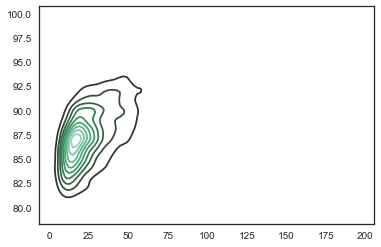

In [150]:
sns.kdeplot(reviews[reviews['price'] < 200].loc[:, ['price', 'points']].dropna().sample(5000))

## Distplot

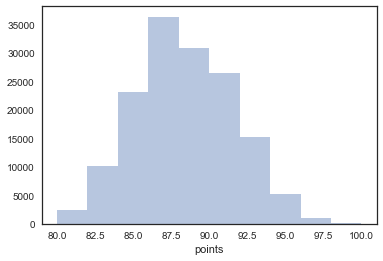

In [153]:
sns.distplot(reviews['points'], bins=10, kde=False)

## Scatterplot and hexplot

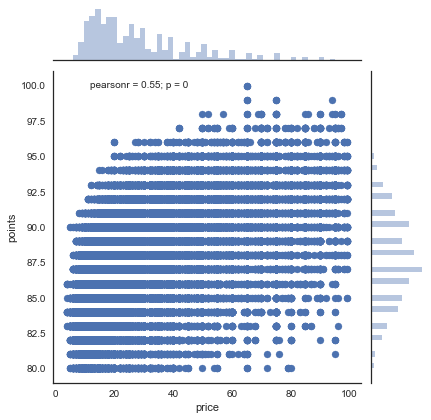

In [155]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100]);

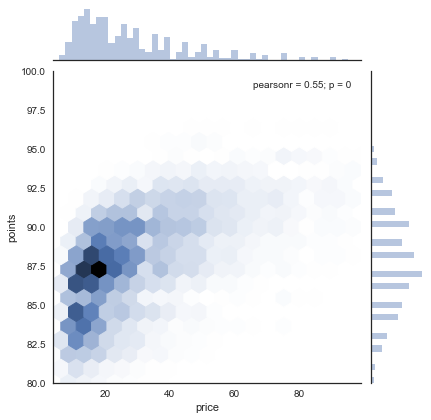

In [157]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100], 
              kind='hex', 
              gridsize=20);

## Boxplot and violin plot

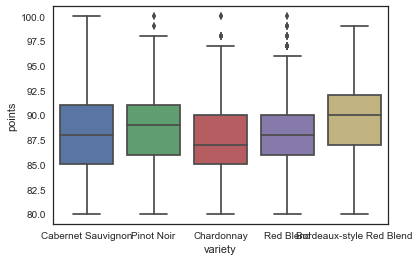

In [158]:
df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]

sns.boxplot(
    x='variety',
    y='points',
    data=df
);

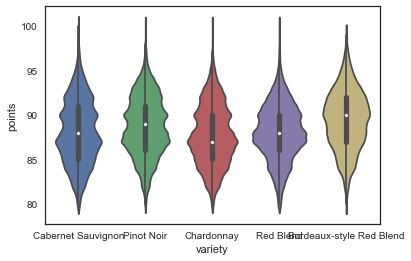

In [159]:
sns.violinplot(
    x='variety',
    y='points',
    data=reviews[reviews.variety.isin(reviews.variety.value_counts()[:5].index)]
)